## FP3 - Final
### Jacob Avenaim

***

Within this section, we will be exploring the ever present problem of predicting stock prices. In particular, we will be analyzing and predicting the prices for GME following the massive price surge the prior months due to a huge short squeeze. The label we want to predict will be the price of GME. With this being said, there are many covariates that affect the price of stock. Within this model, we will be focusing on the “Open, High, Low, Adj Close, and Volume,” as well as two complementary stocks, AMC Theaters (AMC) and Nokia (NOK), that were shorted as well during the same time frame. Lastly, our last two explanatory variables will come from larger market data from the S&P 500 as well as NASDAQ. To clarify some definitions, stocks are publicly traded ownership of corporations. To put it simpler, it’s an exchange of money now (price of stock), for a stream of future profits of the corporation. Further, substitutes are typically consumed in place of the other, and a complement is consumed together. In our case, AMC and NOK are both complements, in which they both faced similar but smaller short squeeze than GME. When analyzing the price movement of both companies, there was a massive exponential spike in price these past months, in which all three companies followed a very similar price change trend. This is due to the fact that all three companies were shorted with massive capital to try and drive the stock down. The reason for this is when you short a stock, it’s the right to sell at whatever strike price they enter the contract. If the price goes down, the short sellers get to sell at the higher price leading to profits. In response to this, many smaller investors caugnt on to this, so they entered into call options. Call options are the right to buy at strike price, so if the price goes up, they get to sell at the higher price. To put this all together, these two actions caused a massive squeeze was due to the large amount of capital on the short sell side. Due to this, when the smaller investors started to in large quantities enter call options, the price would go up, so the the large hedge fund companies had to hedge their risk (buy stock) which skyrocketed the stock in order to mitigate their losses. But with AMC and NOK being complements, an increase in the use of complements shifts the demand curve up (increased demand). So, it can be predicted that a short squeeze would lead to higher prices for GME, which would in theory shift AMC and NOK price up as well. An economist and or politician should care about the prediction of prices of stocks as it can indicate macro market trends. For example, the price of a stock typically is an indication of high valuation which can be a precursor to market performance. 

***

## Sources
Yahoo Finance


***

# Preliminaries
- import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split



sns.set(rc = {'axes.titlesize': 24,
                 'axes.labelsize': 20,
                 'xtick.labelsize': 12,
                'ytick.labelsize': 12,
                 'figure.figsize': (12, 4)})

***

# Prep
- read in csv files
- set index to date because that is present within all data frames
- add features

In [2]:
gme = pd.read_csv('GME.csv')
nok = pd.read_csv('NOK.csv')
bb = pd.read_csv('BB.csv')

In [3]:
# add columns of complementary stock prices
gme['nok_close'] = nok.Close
gme['bb_close'] = bb.Close
gme

,Date,Open,High,Low,Close,Adj Close,Volume,nok_close,bb_close
0,2002-02-13,9.625000,10.060000,9.525000,10.050000,6.766666,19054000,22.850000,3.985000
1,2002-02-14,10.175000,10.195000,9.925000,10.000000,6.733003,2755400,23.040001,3.931667
2,2002-02-15,10.000000,10.025000,9.850000,9.950000,6.699336,2097400,22.639999,3.818333
3,2002-02-19,9.900000,9.900000,9.375000,9.550000,6.430017,1852600,21.639999,3.816667
4,2002-02-20,9.600000,9.875000,9.525000,9.875000,6.648838,1723200,20.590000,3.798333
...,...,...,...,...,...,...,...,...,...
4808,2021-03-22,205.259995,210.360001,186.199997,194.490005,194.490005,10061500,4.020000,10.950000
4809,2021-03-23,197.500000,201.750000,177.550003,181.750000,181.750000,14429100,4.060000,10.710000
4810,2021-03-24,157.979996,166.970001,118.620003,120.339996,120.339996,24177900,3.980000,10.070000
4811,2021-03-25,123.489998,187.500000,116.900002,183.750000,183.750000,50962300,3.920000,9.580000


In [4]:
# add lag features of GME
gme['gme_lag_period1'] = gme.Close.shift(1).dropna()
gme['gme_lag_period2'] = gme.Close.shift(50).dropna()
gme['gme_lag_period3'] = gme.Close.shift(100).dropna()
gme

,Date,Open,High,Low,Close,Adj Close,Volume,nok_close,bb_close,gme_lag_period1,gme_lag_period2,gme_lag_period3
0,2002-02-13,9.625000,10.060000,9.525000,10.050000,6.766666,19054000,22.850000,3.985000,NaN,NaN,NaN
1,2002-02-14,10.175000,10.195000,9.925000,10.000000,6.733003,2755400,23.040001,3.931667,10.050000,NaN,NaN
2,2002-02-15,10.000000,10.025000,9.850000,9.950000,6.699336,2097400,22.639999,3.818333,10.000000,NaN,NaN
3,2002-02-19,9.900000,9.900000,9.375000,9.550000,6.430017,1852600,21.639999,3.816667,9.950000,NaN,NaN
4,2002-02-20,9.600000,9.875000,9.525000,9.875000,6.648838,1723200,20.590000,3.798333,9.550000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4808,2021-03-22,205.259995,210.360001,186.199997,194.490005,194.490005,10061500,4.020000,10.950000,200.270004,18.080000,13.45
4809,2021-03-23,197.500000,201.750000,177.550003,181.750000,181.750000,14429100,4.060000,10.710000,194.490005,17.690001,12.69
4810,2021-03-24,157.979996,166.970001,118.620003,120.339996,120.339996,24177900,3.980000,10.070000,181.750000,19.940001,11.82
4811,2021-03-25,123.489998,187.500000,116.900002,183.750000,183.750000,50962300,3.920000,9.580000,120.339996,19.950001,11.73


In [5]:
gme = gme.dropna()
gme

,Date,Open,High,Low,Close,Adj Close,Volume,nok_close,bb_close,gme_lag_period1,gme_lag_period2,gme_lag_period3
100,2002-07-09,9.850000,10.215000,9.620000,9.750000,6.564678,540600,14.50,2.133333,9.905000,9.625000,10.050
101,2002-07-10,9.750000,10.050000,9.475000,9.600000,6.463681,536000,14.45,2.171667,9.750000,9.450000,10.000
102,2002-07-11,9.525000,9.545000,8.875000,9.215000,6.204461,610800,13.75,2.133333,9.600000,9.525000,9.950
103,2002-07-12,9.215000,9.215000,8.785000,8.845000,5.955338,263200,13.97,2.221667,9.215000,10.250000,9.550
104,2002-07-15,8.835000,8.835000,7.900000,8.350000,5.622057,325000,13.63,2.303333,8.845000,10.415000,9.875
...,...,...,...,...,...,...,...,...,...,...,...,...
4808,2021-03-22,205.259995,210.360001,186.199997,194.490005,194.490005,10061500,4.02,10.950000,200.270004,18.080000,13.450
4809,2021-03-23,197.500000,201.750000,177.550003,181.750000,181.750000,14429100,4.06,10.710000,194.490005,17.690001,12.690
4810,2021-03-24,157.979996,166.970001,118.620003,120.339996,120.339996,24177900,3.98,10.070000,181.750000,19.940001,11.820
4811,2021-03-25,123.489998,187.500000,116.900002,183.750000,183.750000,50962300,3.92,9.580000,120.339996,19.950001,11.730


In [6]:
gme['Date'] =  pd.to_datetime(gme['Date'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
gme.set_index(['Date'], inplace = True)
gme

,Open,High,Low,Close,Adj Close,Volume,nok_close,bb_close,gme_lag_period1,gme_lag_period2,gme_lag_period3
Date,,,,,,,,,,,
2002-07-09,9.850000,10.215000,9.620000,9.750000,6.564678,540600,14.50,2.133333,9.905000,9.625000,10.050
2002-07-10,9.750000,10.050000,9.475000,9.600000,6.463681,536000,14.45,2.171667,9.750000,9.450000,10.000
2002-07-11,9.525000,9.545000,8.875000,9.215000,6.204461,610800,13.75,2.133333,9.600000,9.525000,9.950
2002-07-12,9.215000,9.215000,8.785000,8.845000,5.955338,263200,13.97,2.221667,9.215000,10.250000,9.550
2002-07-15,8.835000,8.835000,7.900000,8.350000,5.622057,325000,13.63,2.303333,8.845000,10.415000,9.875
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,205.259995,210.360001,186.199997,194.490005,194.490005,10061500,4.02,10.950000,200.270004,18.080000,13.450
2021-03-23,197.500000,201.750000,177.550003,181.750000,181.750000,14429100,4.06,10.710000,194.490005,17.690001,12.690
2021-03-24,157.979996,166.970001,118.620003,120.339996,120.339996,24177900,3.98,10.070000,181.750000,19.940001,11.820


In [8]:
gme['Volume'] = gme['Volume'].astype(float)
gme

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,nok_close,bb_close,gme_lag_period1,gme_lag_period2,gme_lag_period3
Date,,,,,,,,,,,
2002-07-09,9.850000,10.215000,9.620000,9.750000,6.564678,540600.0,14.50,2.133333,9.905000,9.625000,10.050
2002-07-10,9.750000,10.050000,9.475000,9.600000,6.463681,536000.0,14.45,2.171667,9.750000,9.450000,10.000
2002-07-11,9.525000,9.545000,8.875000,9.215000,6.204461,610800.0,13.75,2.133333,9.600000,9.525000,9.950
2002-07-12,9.215000,9.215000,8.785000,8.845000,5.955338,263200.0,13.97,2.221667,9.215000,10.250000,9.550
2002-07-15,8.835000,8.835000,7.900000,8.350000,5.622057,325000.0,13.63,2.303333,8.845000,10.415000,9.875
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,205.259995,210.360001,186.199997,194.490005,194.490005,10061500.0,4.02,10.950000,200.270004,18.080000,13.450
2021-03-23,197.500000,201.750000,177.550003,181.750000,181.750000,14429100.0,4.06,10.710000,194.490005,17.690001,12.690
2021-03-24,157.979996,166.970001,118.620003,120.339996,120.339996,24177900.0,3.98,10.070000,181.750000,19.940001,11.820


In [9]:
gme.head()

,Open,High,Low,Close,Adj Close,Volume,nok_close,bb_close,gme_lag_period1,gme_lag_period2,gme_lag_period3
Date,,,,,,,,,,,
2002-07-09,9.850,10.215,9.620,9.750,6.564678,540600.0,14.50,2.133333,9.905,9.625,10.050
2002-07-10,9.750,10.050,9.475,9.600,6.463681,536000.0,14.45,2.171667,9.750,9.450,10.000
2002-07-11,9.525,9.545,8.875,9.215,6.204461,610800.0,13.75,2.133333,9.600,9.525,9.950
2002-07-12,9.215,9.215,8.785,8.845,5.955338,263200.0,13.97,2.221667,9.215,10.250,9.550
2002-07-15,8.835,8.835,7.900,8.350,5.622057,325000.0,13.63,2.303333,8.845,10.415,9.875


In [10]:
gme.shape

(4713, 11)

In [11]:
gme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4713 entries, 2002-07-09 to 2021-03-26
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             4713 non-null   float64
 1   High             4713 non-null   float64
 2   Low              4713 non-null   float64
 3   Close            4713 non-null   float64
 4   Adj Close        4713 non-null   float64
 5   Volume           4713 non-null   float64
 6   nok_close        4713 non-null   float64
 7   bb_close         4713 non-null   float64
 8   gme_lag_period1  4713 non-null   float64
 9   gme_lag_period2  4713 non-null   float64
 10  gme_lag_period3  4713 non-null   float64
dtypes: float64(11)
memory usage: 441.8 KB


In [12]:
gme.describe()

,Open,High,Low,Close,Adj Close,Volume,nok_close,bb_close,gme_lag_period1,gme_lag_period2,gme_lag_period3
count,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4.713000e+03,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000
mean,24.495846,25.142926,23.803004,24.427244,18.107658,3.746375e+06,11.390891,26.356659,24.390941,23.166887,23.106345
std,19.992111,22.277965,17.391083,19.227073,17.124551,7.759572e+06,7.912767,29.285026,19.092435,13.355286,13.397225
min,2.850000,2.940000,2.570000,2.800000,2.555174,7.200000e+04,1.690000,1.403333,2.800000,2.800000,2.800000
25%,12.650000,12.975000,12.470000,12.730000,10.904095,1.614800e+06,5.430000,7.600000,12.720000,11.670000,11.250000
50%,22.090000,22.459999,21.760000,22.110001,15.714822,2.556300e+06,8.000000,11.600000,22.110001,21.850000,21.850000
75%,30.570000,31.250000,30.010000,30.540001,22.720905,3.881600e+06,15.960000,36.263332,30.520000,29.639999,29.629999
max,379.709991,483.000000,262.269989,347.510010,347.510010,1.971579e+08,41.099998,147.550003,347.510010,63.299999,63.299999


In [13]:
gme.to_csv("final_data.csv")

In [14]:
gme.to_pickle("final_data.pkl")

***
# Label Figure
- Response
    - Do not need a difference of label as units are equivalent.

<AxesSubplot:title={'center':'Prediction of Price'}, xlabel='Time', ylabel='Price'>

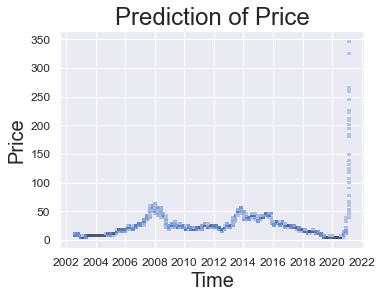

In [15]:
plt.figure()
plt.subplot(1,2,1)
plt.title('Prediction of Price')
plt.xlabel('Time')
plt.ylabel('Price')
sns.histplot(x = 'Date', y = 'Close', data = gme, bins = 100)

***
# Feature Transformation
- Response
    - Do not need a difference of label as units are equivalent.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


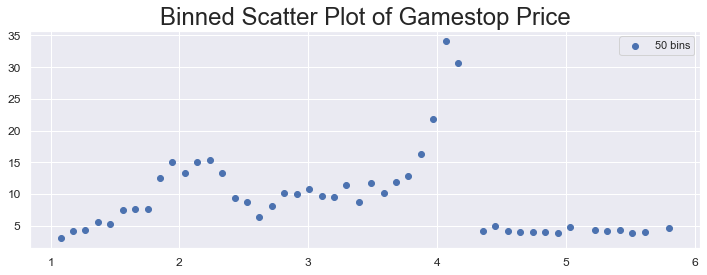

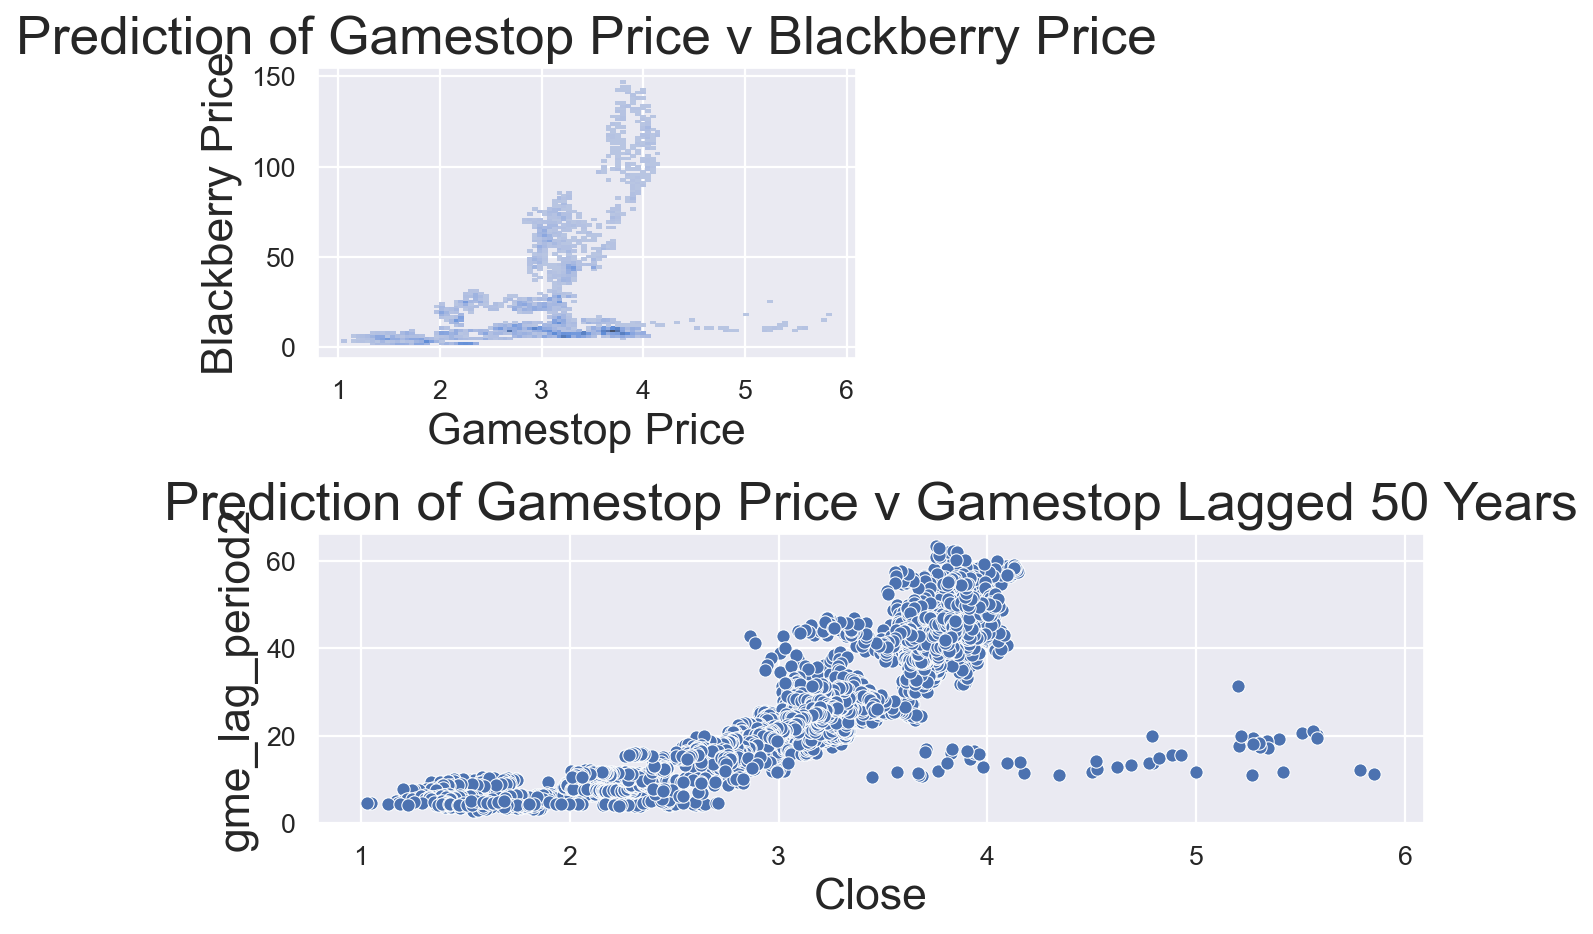

In [16]:
# sns.pairplot(data = gme, kind = 'hist',
                  # plot_kws = {'bins': 100}, diag_kws = {'bins': 10})
# plt.show()


# Binned scatter plot (you should know this as an economist)
from scipy.stats import binned_statistic

# binned_statistic?
n = 50
bin_mean, bin_edge, bin_number = binned_statistic(np.log(gme.Close), gme.nok_close, bins = n)

x = np.average([bin_edge[:-1], bin_edge[1:]], axis = 0)

plt.scatter(x, bin_mean, label = '%d bins' % n)
plt.title('Binned Scatter Plot of Gamestop Price')
plt.legend()


# Many Plots
gme['Close'] = np.log(gme.Close)

plt.figure(figsize = (8, 6), dpi = 160)
plt.subplot(2, 2, 1)
plt.title('Prediction of Gamestop Price v Blackberry Price')
plt.xlabel('Gamestop Price')
plt.ylabel('Blackberry Price')
sns.histplot(x = 'Close', y = 'bb_close', data = gme, bins = 100)


plt.subplot(2, 1, 2)
sns.scatterplot(data = gme, x = 'Close', y = 'gme_lag_period2')
plt.title('Prediction of Gamestop Price v Gamestop Lagged 50 Years')

plt.tight_layout()
plt.savefig('figure')

The relationships of the pair plots are all linear in fashion. The other two features are associated with high correlation to the label we are trying to predict. As you can see with the complement, there is a similar increase in 2021 to gme due to the short squeeze. 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 2/3,
                                                    random_state = 490)

NameError: name 'y' is not defined

In [ ]:
fit_lasso = sm.OLS(y_train, x_train_std).fit_regularized(alpha = 10, L1_wt = 1)
# note: there is no fit.summary()
fit_lasso.params

In [ ]:
param_grid = [
    {'alpha': 10**np.linspace(-2, 2, num = 20)}
]

# We are manually supplying an intercept
# and standardized (not normalized) the features
cv_lasso = lm.Lasso(fit_intercept = False, normalize = False,
                    random_state = 490)
grid_search = GridSearchCV(cv_lasso, param_grid, cv = 5,
                         scoring = 'neg_root_mean_squared_error')
grid_search.fit(x_train_std, y_train)
print(grid_search.best_params_)
best = grid_search.best_params_['alpha']
best

In [ ]:
fit_lasso_tuned = sm.OLS(y_train, x_train_std).fit_regularized(L1_wt = 1, alpha = best)
fit_lasso_tuned.params